In [2]:
import quandl
import pandas as pd
import numpy as np
import seaborn as sns
import pyfolio as pf
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
symbols = pd.read_csv('ind_nifty50list.csv')
symbols.head()

,Company Name,Industry,Symbol,Series,ISIN Code
0,Adani Ports and Special Economic Zone Ltd.,SERVICES,ADANIPORTS,EQ,INE742F01042
1,Asian Paints Ltd.,CONSUMER GOODS,ASIANPAINT,EQ,INE021A01026
2,Axis Bank Ltd.,FINANCIAL SERVICES,AXISBANK,EQ,INE238A01034
3,Bajaj Auto Ltd.,AUTOMOBILE,BAJAJ-AUTO,EQ,INE917I01010
4,Bajaj Finance Ltd.,FINANCIAL SERVICES,BAJFINANCE,EQ,INE296A01024


In [40]:
#data = quandl.get('NSE/'+symbols.Symbol[0], start_date='2012-01-1', end_date='2018-08-20')
#data.head()

In [4]:
df = pd.DataFrame(columns=['Date','symbol','Open','prv_Close','Close','High','Low','Gap'])
def get_data(x):
    global df
    try:
        data = quandl.get('NSE/'+x, start_date='2012-01-1', end_date='2018-08-20')

        for i in range(len(data)):
            if (data.Open[i+1]<data.Close[i]*0.98) or (data.Open[i+1]>data.Close[i]*1.02):
                df.loc[len(df)] = [data.index[i+1],x,data.Open[i+1],data.Close[i],data.Close[i+1],data.High[i+1],data.Low[i+1],np.round((data.Open[i+1]/data.Close[i])-1,3)]
    except:
        pass
    

In [5]:
temp = symbols.Symbol.apply(get_data)

In [6]:
df.head()

,Date,symbol,Open,prv_Close,Close,High,Low,Gap
0,2012-02-22,ADANIPORTS,155.75,152.65,143.85,157.75,142.40,0.020
1,2012-03-13,ADANIPORTS,125.00,129.90,131.10,133.95,125.00,-0.038
2,2012-05-10,ADANIPORTS,120.00,122.85,125.05,126.30,118.90,-0.023
3,2012-05-18,ADANIPORTS,111.05,113.80,111.70,113.40,109.75,-0.024
4,2012-08-03,ADANIPORTS,118.50,121.60,121.55,122.95,118.50,-0.025


In [7]:
for i in range(len(df)):
  if df.Gap[i]<0:
    if df.High[i] >= df.prv_Close[i]:
          df.loc[i,'gap_left'] = 0
          df.loc[i,'returns'] = (abs(df.Gap[i])) * 100
    else:
          df.loc[i,'gap_left'] = (np.round(df.High[i]/df.prv_Close[i]-1,3)) * 100
          df.loc[i,'returns'] = (np.round(df.Close[i]/df.Open[i]-1,3)) * 100
   
  else:
    if df.Low[i] <= df.prv_Close[i]:
          df.loc[i,'gap_left'] = 0
          df.loc[i,'returns'] = (abs(df.Gap[i]))* 100
    else:
          df.loc[i,'gap_left'] = (np.round(df.Low[i]/df.prv_Close[i]-1,3)) * 100
          df.loc[i,'returns'] = (np.round(1-(df.Close[i]/df.Open[i]),3)) *100

In [8]:
df.Gap = df.Gap*100
df['percent_left'] = round(100*df.gap_left/df.Gap,3)
df.head()

,Date,symbol,Open,prv_Close,Close,High,Low,Gap,gap_left,returns,percent_left
0,2012-02-22,ADANIPORTS,155.75,152.65,143.85,157.75,142.40,2.0,0.0,2.0,0.000
1,2012-03-13,ADANIPORTS,125.00,129.90,131.10,133.95,125.00,-3.8,0.0,3.8,-0.000
2,2012-05-10,ADANIPORTS,120.00,122.85,125.05,126.30,118.90,-2.3,0.0,2.3,-0.000
3,2012-05-18,ADANIPORTS,111.05,113.80,111.70,113.40,109.75,-2.4,-0.4,0.6,16.667
4,2012-08-03,ADANIPORTS,118.50,121.60,121.55,122.95,118.50,-2.5,0.0,2.5,-0.000


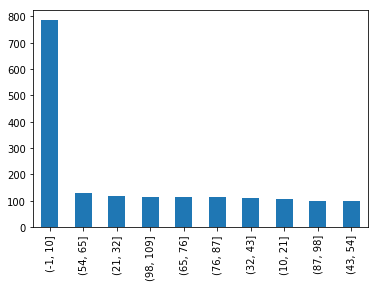

In [18]:
frequency = pd.cut(df.percent_left,bins = range(-1,110,11))
frequency.value_counts().plot(kind='bar');

In [25]:
returns_data = pd.DataFrame(columns=['Date','Returns'])
for i in df.Date.unique():
    x = df[df.Date == i]
    returns_data.loc[len(returns_data)] = [i,np.mean(x['returns'])]
returns_data.head()

,Date,Returns
0,2012-02-22,2.000000
1,2012-03-13,3.800000
2,2012-05-10,2.300000
3,2012-05-18,1.122222
4,2012-08-03,-0.550000


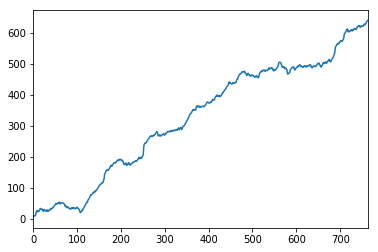

In [27]:
returns_data.Returns.cumsum().plot();

Start date,2012-02-22
End date,2014-08-21
Total months,36
,Backtest
Annual return,650.4%
Cumulative returns,44944.7%
Annual volatility,42.1%
Sharpe ratio,5.01
Calmar ratio,19.93
Stability,0.97
Max drawdown,-32.6%


Worst drawdown periods,Net drawdown in %,Peak date,Valley date,Recovery date,Duration
0,32.64,2015-02-13,2014-02-24,2016-11-02,449
1,29.34,2018-02-09,2017-11-08,2012-11-26,0
2,19.52,2018-02-28,2013-07-25,2014-09-26,0
3,17.88,2013-03-25,2012-04-24,2017-05-10,1078
4,14.18,2015-04-06,2018-07-19,2017-05-30,562


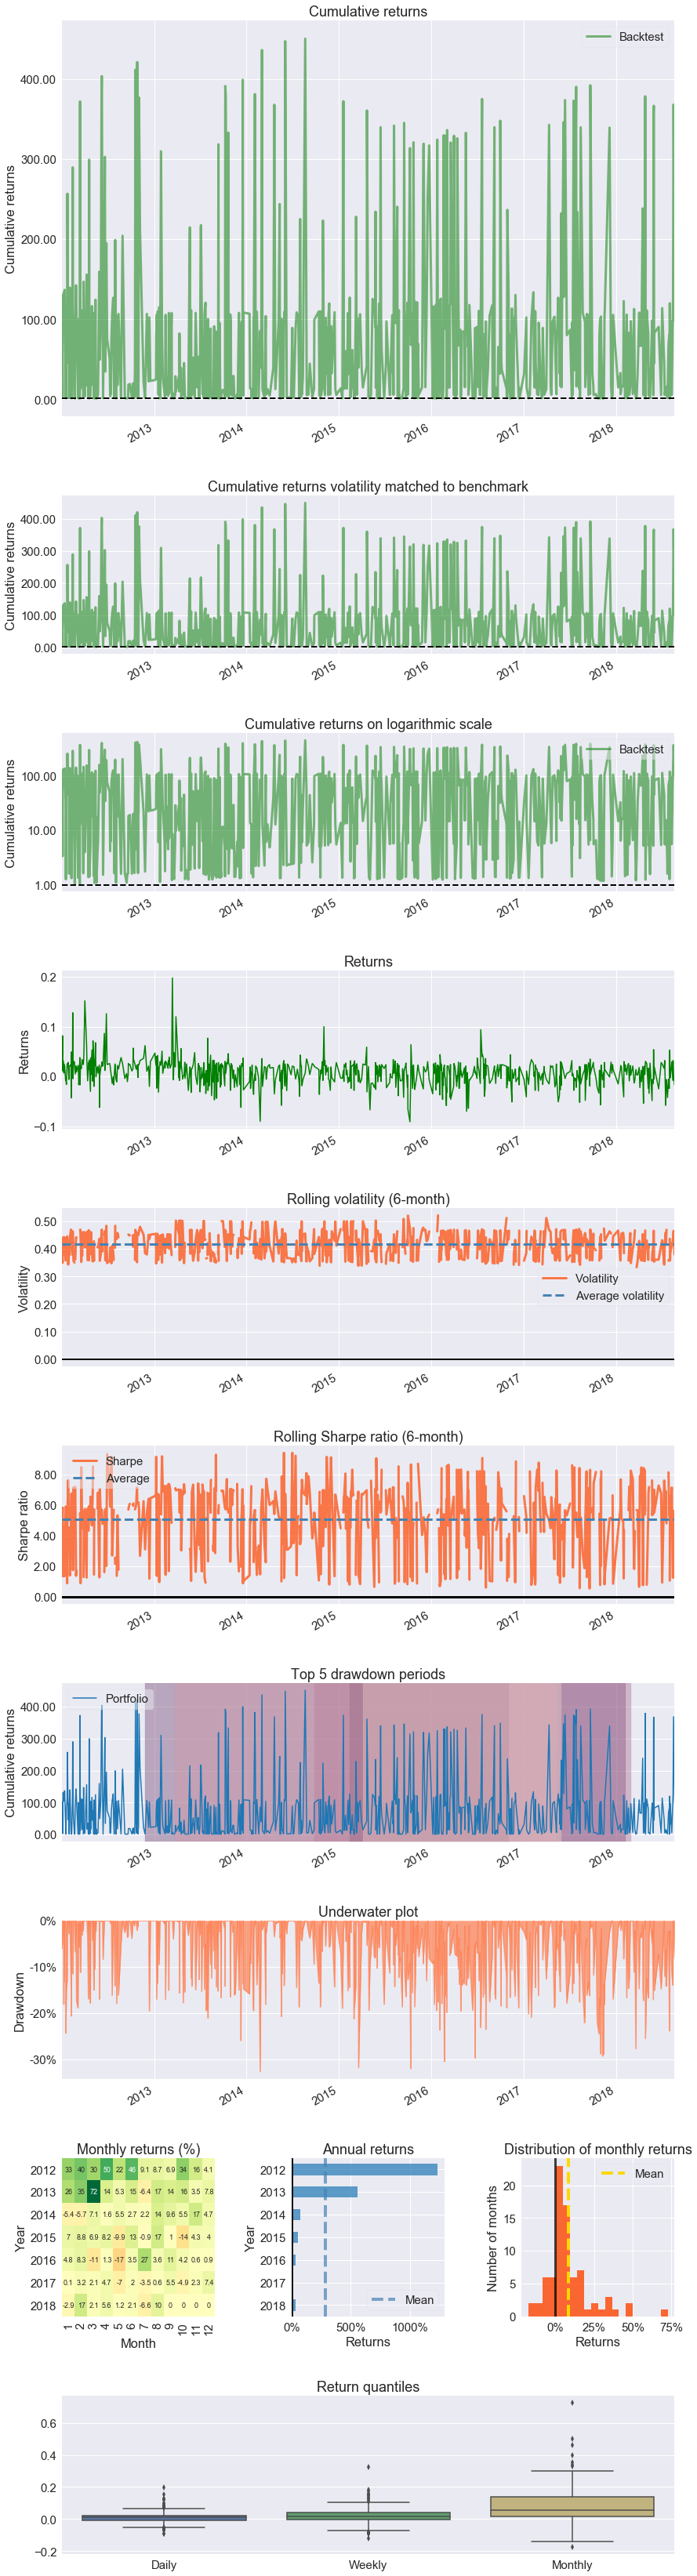

C:\Users\mom1\AppData\local\AmlWorkbench\Python\lib\site-packages\pyfolio\tears.py:974: UserWarning: Passed returns do not overlap with anyinteresting times.
  'interesting times.', UserWarning)


In [50]:
returns_data.index = returns_data.Date
pf.create_full_tear_sheet(returns_data.Returns/100,benchmark_rets=None)